## Mall Customers

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#%matplotlib inline

In [49]:
# Import Dataset
mall_customers = pd.read_csv('datasets/mall-customers.csv')
mall_customers.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [50]:
mall_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Extracting Features

In [51]:
# assign the Annual Income (k$) and Spending Score (1-100) to X and convert it to numpy.ndarray
X = mall_customers.iloc[:,3:5].values
annual_income = X[:,0]
spending_score = X[:,1]

#### Exploring Data

Text(0, 0.5, 'Spending Score')

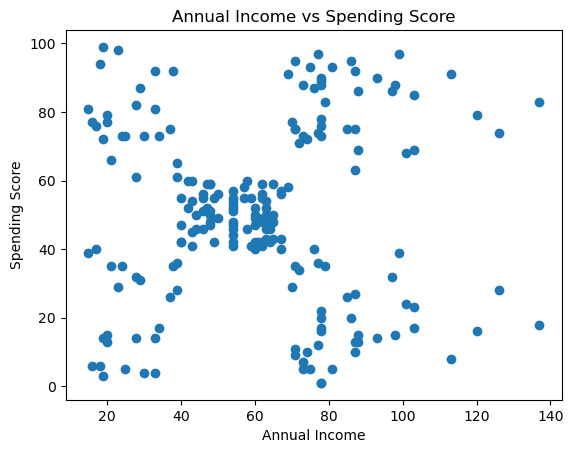

In [52]:
plt.scatter(annual_income, spending_score)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

#### Cluster Optimal Number

In [74]:
wcss = []
for i in range(1,21):
    k_means = KMeans(n_clusters=i)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
print("Within Cluster Sum of Products: \n {}".format(wcss))

c:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Within Cluster Sum of Products: 
 [269981.28, 181363.595959596, 106348.37306211119, 73679.78903948837, 44448.45544793371, 37271.8862365895, 30259.65720728547, 25011.920255473768, 21850.16528258563, 19701.352251281744, 17587.14631879711, 15808.031801889865, 14585.7861000111, 13115.003030571579, 12049.830636030634, 10801.965964590963, 10127.668615436287, 9267.016143807798, 8790.488579403054, 8290.825980392157]


Text(0, 0.5, 'WCSS')

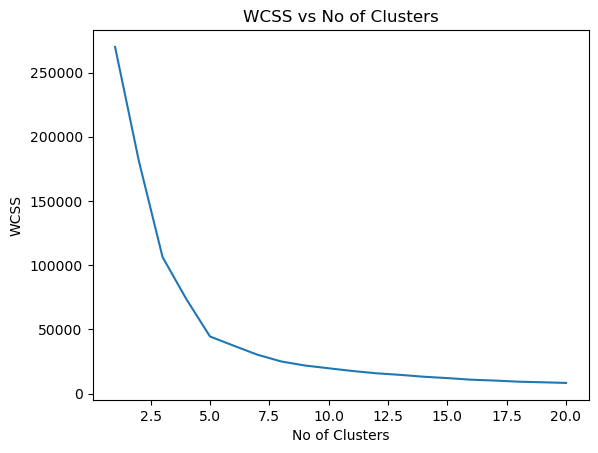

In [77]:
plt.plot(range(1,21), wcss)
plt.title('WCSS vs No of Clusters')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')

#### Model Training and Prediction

In [82]:
# Model Training
k_means = KMeans(n_clusters=5, init = 'k-means++', random_state = 42)
k_means.fit(X)

KMeans(n_clusters=5, random_state=42)

In [83]:
# Cluster Centers & Labels & Inertia
print("Cluster Centers:\n {}".format(k_means.cluster_centers_))
print("Labels:\n {}".format(k_means.labels_))
print("Inertia:\n {} at {} Clusters".format(k_means.inertia_,k_means.n_clusters))

Cluster Centers:
 [[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]
Labels:
 [2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]
Inertia:
 44448.45544793371 at 5 Clusters


In [84]:
# Prediction
y = k_means.fit_predict(X)
y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [85]:
# New DF and add the cluster Column to it
mall_customers_cluster = mall_customers.copy()
mall_customers_cluster['Cluster'] = y
mall_customers_cluster.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2


Text(0, 0.5, 'Spending Score')

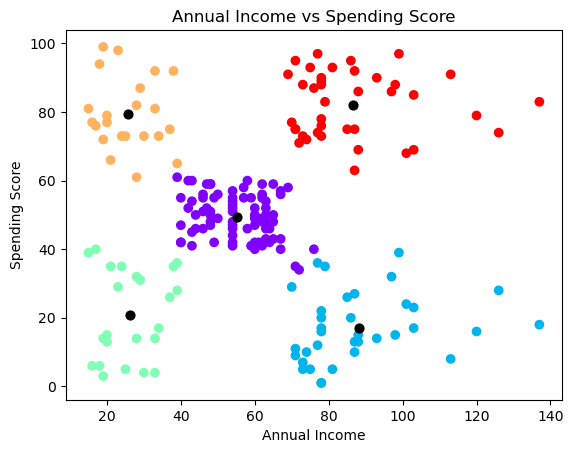

In [92]:
plt.scatter(annual_income, spending_score, c=k_means.labels_, cmap='rainbow')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1], c='k', s=40)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')